
Model: Logistic Regression
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: nan

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Model: Decision Tree
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: nan

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Model: Random Forest
Precision: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


Recall: 1.0
F1 Score: 1.0
ROC-AUC: nan

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


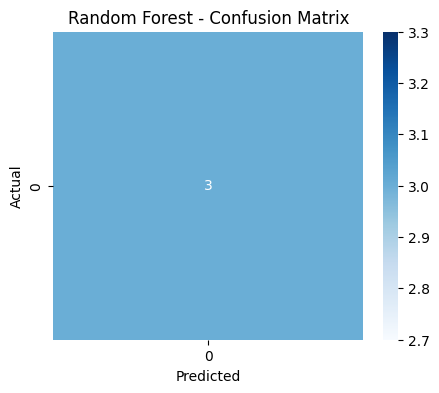

In [1]:
# ================================
# Credit Scoring Model
# ================================

# Step 1: Install & Import Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Create or Load Dataset
# For demo purposes, we'll create a small synthetic dataset
data = {
    'income': [50000, 60000, 35000, 80000, 20000, 90000, 30000, 40000, 75000, 100000],
    'debts': [10000, 20000, 5000, 10000, 15000, 3000, 12000, 8000, 7000, 1000],
    'payment_history': [0.9, 0.8, 0.6, 0.95, 0.5, 0.98, 0.4, 0.7, 0.85, 1.0],  # 1 = perfect history
    'age': [25, 40, 30, 35, 28, 50, 33, 29, 45, 38],
    'creditworthy': [1, 1, 0, 1, 0, 1, 0, 0, 1, 1]  # 1 = good credit, 0 = bad credit
}

df = pd.DataFrame(data)

# Step 3: Features & Target
X = df.drop('creditworthy', axis=1)
y = df['creditworthy']

# Step 4: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Scale Features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train Models
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Step 7: Predictions
models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rf}

for name, model in models.items():
    if name == 'Logistic Regression':
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    print(f"\nModel: {name}")
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Confusion Matrix for Random Forest
y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
